In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 9.  , 71.  ,  1.  , 40.5 , 36.  , 33.  , 23.  ,  9.  , 29.  ,
       32.  , 43.  , 23.  , 56.  ,  6.  , 16.  , 22.  , 34.  , 27.  ,
       18.  , 27.  , 26.  , 16.  , 51.  , 22.  ,  4.  , 32.  , 44.  ,
       42.  ,  0.75, 60.  , 25.  , 52.  , 20.  , 47.  , 40.  , 33.  ,
       24.  ,  2.  , 39.  , 24.  , 21.  ,  9.  , 15.  , 14.  , 27.  ,
       30.  , 58.  , 26.  , 53.  , 33.  , 18.  , 34.  , 60.  , 35.  ,
       31.  , 36.  , 28.  , 40.  , 20.  , 22.  , 25.  , 70.  , 35.  ,
       27.  , 32.  , 38.  , 48.  , 65.  , 26.  , 11.  , 36.  , 25.  ,
       14.5 , 59.  , 26.  , 18.  , 22.  , 19.  , 34.  , 21.  , 40.  ,
       19.  , 14.  , 23.  , 41.  ,  7.  , 10.  , 33.  , 28.5 , 20.  ,
       34.  , 25.  , 28.  , 22.  , 21.  , 58.  , 16.  , 26.  , 17.  ,
       39.  , 21.  , 59.  , 28.5 ,  5.  , 30.  , 63.  , 42.  , 35.  ,
       24.  , 36.  , 18.  , 35.  , 33.  , 41.  , 35.  , 22.  , 36.  ,
       51.  , 18.  , 56.  , 29.  , 30.  , 28.  , 29.  , 43.  , 42.  ,
       24.  , 38.  ,

In [12]:
X_train['Age'].isnull().sum()

148

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,39.0
493,71.0,49.5042,71.0
527,NaN,221.7792,16.0


C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot

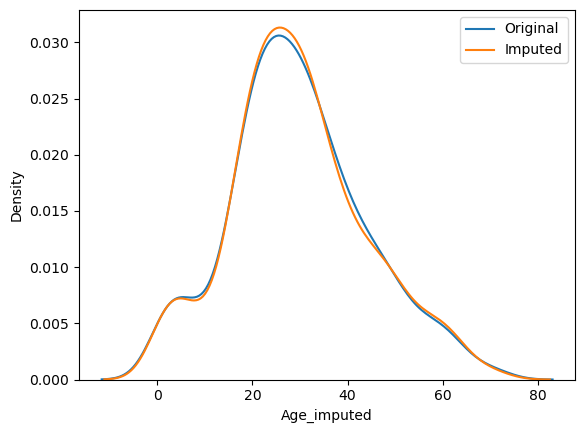

In [14]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()#distribution is almost same
plt.show()

In [15]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())#variation is also same in both 

Original variable variance:  204.3495133904614
Variance after random imputation:  204.0519016134894


In [16]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()#but the covariance is disturbed with the other columns 

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,55.825152
Age,71.512440,204.349513,204.349513
Age_imputed,55.825152,204.349513,204.051902


<Axes: >

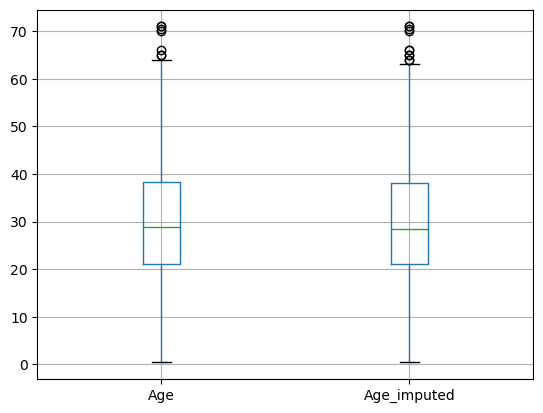

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [19]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare'])) #can give different outputs during production as 
# we take values from sample randomly so the value can be anything so can give the different outcomes.so for same given input generate same random number so we put random state

TypeError: cannot convert the series to <class 'int'>

In [20]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [21]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [22]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [23]:
X = data
y = data['SalePrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1056,Gd,TA,185850,TA,Gd
133,NaN,TA,220000,TA,NaN
560,Gd,TA,121500,TA,Gd
814,NaN,TA,116000,TA,NaN
962,TA,TA,155000,TA,TA


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_tr

In [28]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']#almost same 

In [29]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.035959
Gd,0.009973,0.011986
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [30]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp#more values are changing in this so not apply this technique on this 

,original,imputed
Gd,0.494272,0.645342
TA,0.412439,0.542088
Fa,0.040917,0.053872
Po,0.027823,0.037037
Ex,0.024550,0.032548


C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\3924505069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\3924505069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pleas

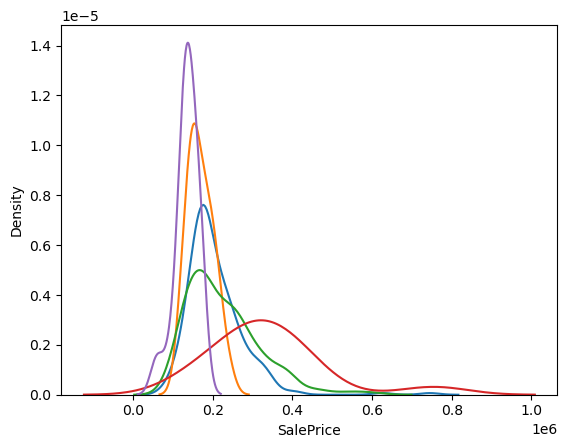

In [31]:
for category in X_train['FireplaceQu'].dropna().unique():
    
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
D:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yuvraj Singh Rathore\AppData\Local\Temp\ipykernel_16800\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.


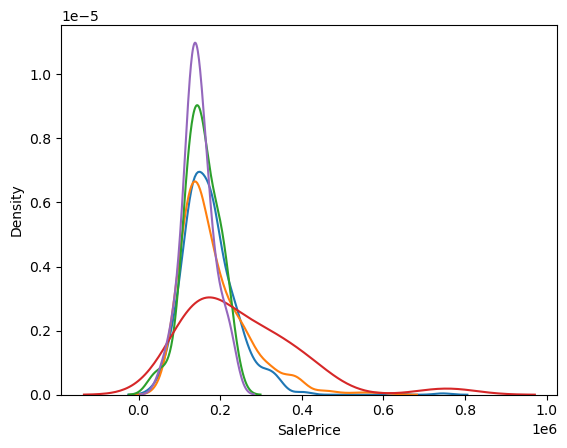

In [32]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()